# 🔶 **Setting Up**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
sns.set_palette("Set2")

In [100]:
ls

drive/  sample_data/


In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Importing Dataframe
df = pd.read_csv('/content/drive/MyDrive/NEW J COMPONENT AI for BIOMED/healthcare-dataset-stroke-data.xls')

In [103]:
# Checking the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [104]:
# Checking for the existance of NULL values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The dataset has some missing values in the BMI column which needs to be removed so that the model performs well. 

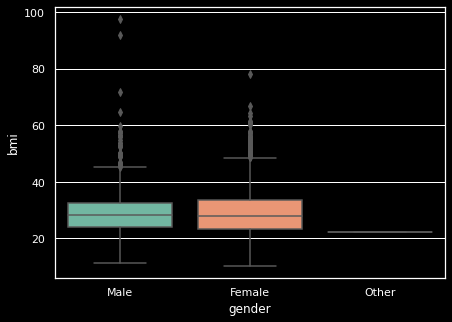

In [105]:
# Creating the box plot for BMI vs Gender
sns.boxplot(x=df['gender'], y=df['bmi'])

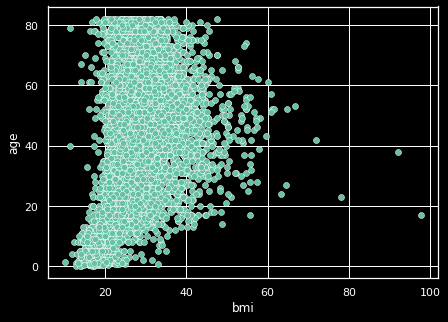

In [106]:
# Creating scatterplot of BMI vs age
sns.scatterplot(data=df, x='bmi', y='age')

We are trying to categorize age into certain groups to get better intution from the dataset. 

In [107]:
age_group = []

for i in df['age']:
  if i<2.0:
    age_group.append('Toodler');
  
  elif i>2.0 and i<=19.0:
    age_group.append('Teen')

  elif i>19.0 and i<60.0:
    age_group.append('Adult')

  else:
    age_group.append('Senior')

df['age_group'] = age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [108]:
fig = px.box(df, x="age_group", y="bmi", color="gender")
fig.show()

In [109]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [110]:
def impute_bmi(cols):
  bmi = cols[0]
  age_group = cols[1]
  gender = cols[2]

  if pd.isnull(bmi):
    if age_group == 'Senior':
      if gender == 'Male':
        return 29.0

      else:
        return 28.9

    elif age_group == 'Adult':
      if gender == 'Male':
        return 30.2
      else:
        return 28.8
    
    elif age_group == 'Teen':
      if gender == 'Male':
        return 18.9
      else:
        return 18.05

  else:
    return bmi

df['bmi'] = df[['bmi', 'age_group', 'gender']].apply(impute_bmi, axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [111]:
# Re-Checking the values of the BMI column
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  6
smoking_status       0
stroke               0
age_group            0
dtype: int64

Since we still have 6 rows with null values, we will drop them as it will not affect the dataset much. 

In [112]:
df = df.fillna(0)

In [113]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

## **Exploratory Data Analysis**



In [114]:
df.shape

(5110, 13)

In [115]:
# Getting the Statistical Details of the Dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.839667,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.784705,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.625000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [116]:
# Getting all the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  age_group          5110 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 519.1+ KB


In [117]:
# To check for duplicates 
df.duplicated().sum()

0

In [118]:
# Separating Categorical Columns and Continuous Columns
con_cols = ['age','avg_glucose_level','bmi']
cat_cols = []

for i in df.columns:
  if i!='id' and i!='stroke' and i not in con_cols:
    cat_cols.append(i)

print(cat_cols)

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group']


🔴Now, we will look into the categorical columns and see the different categorical values present in them along with their individual counts. 

In [119]:
# Checking value in each categorical column
cat_cols.append('age_group')
for i in cat_cols:
  print(f'____________Values in {i}____________\n\n{df[i].value_counts()}\n')


____________Values in gender____________

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

____________Values in hypertension____________

0    4612
1     498
Name: hypertension, dtype: int64

____________Values in heart_disease____________

0    4834
1     276
Name: heart_disease, dtype: int64

____________Values in ever_married____________

Yes    3353
No     1757
Name: ever_married, dtype: int64

____________Values in work_type____________

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

____________Values in Residence_type____________

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

____________Values in smoking_status____________

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

____________Values in age_group____________

Adult      2768
Senior     1431
Teen        79

🔴We can see that all the columns have sufficient data in each category, except the 'gender' column. In the 'gender' column, there is an entry with the value 'other'. Since the number of such entries is very less, we can, for this case, afford to drop that particular row. 


In [120]:
df.drop(index=df[df['gender'] == 'Other'].index[0], axis=0, inplace=True)

IndexError: ignored

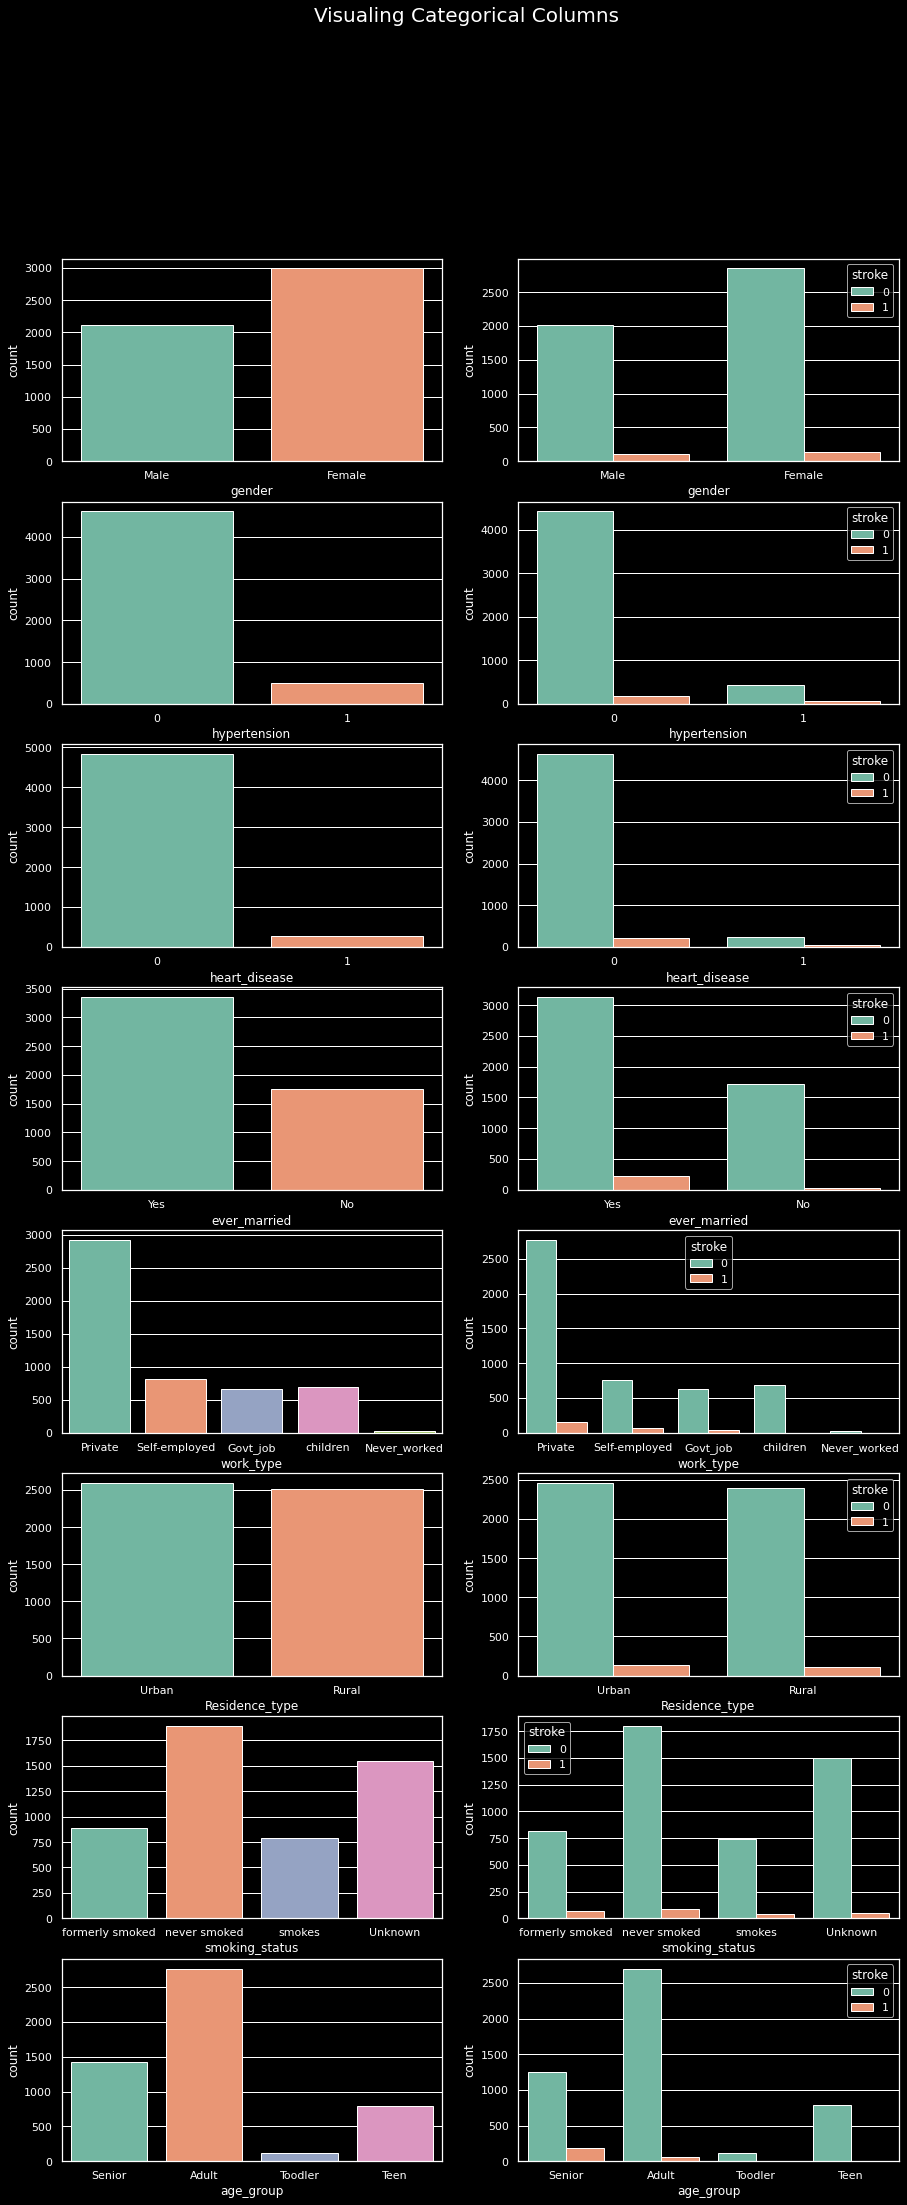

In [121]:
# Visulizing the categorical columns
fig,ax = plt.subplots(8,2, figsize=(15,35))
for index,i in enumerate(cat_cols):
  plt.suptitle("Visualing Categorical Columns", size=20)
  sns.countplot(data=df, x=i, ax=ax[index,0])
  sns.countplot(data=df, x=i, ax=ax[index,1], hue='stroke')

The above plots are divided into 2 separate columns. 

* **The first column** has plots that show different categories present in a particular categorical column of the dataset. It is basically to compare the population that falls under each category for a particular categorical variable.

* **The second column** has plots that show the population of people that suffer from stoke. It clearly plots the stroke count for each category along the total population of that category. 

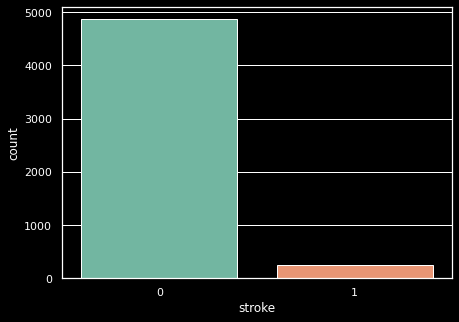

In [122]:
# Checking the count of stoke v/s non stroke cases
'''sns.set(rc={'figure.figsize':(7,5)})
fig = sns.countplot(data=df, x='stroke', orient='v')
plt.show()'''

sns.countplot(data=df, x='stroke')
plt.show()

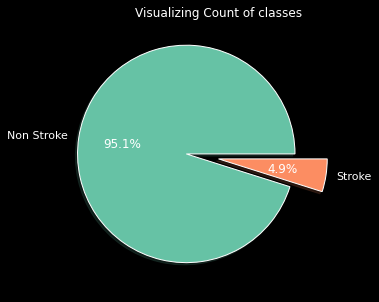

In [123]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

A huge imbalance of classes is found. This would oversample the minority class

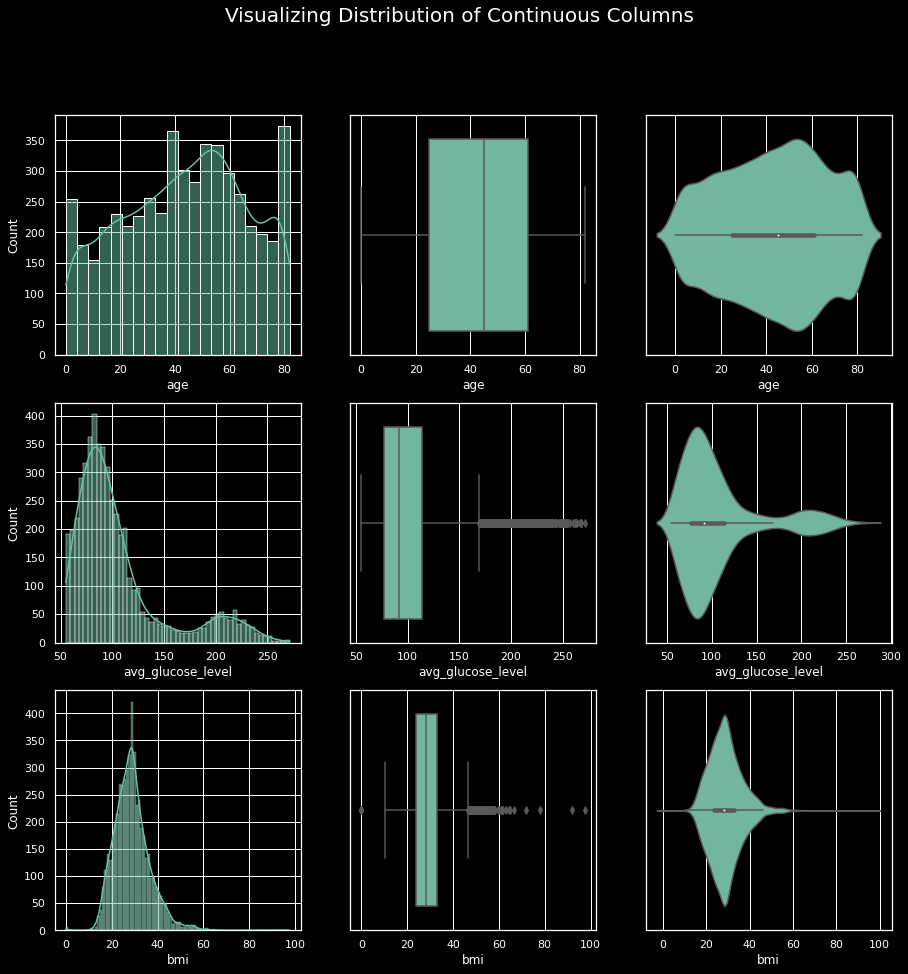

In [124]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index,i in enumerate(con_cols):
    plt.suptitle("Visualizing Distribution of Continuous Columns",size=20)
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])

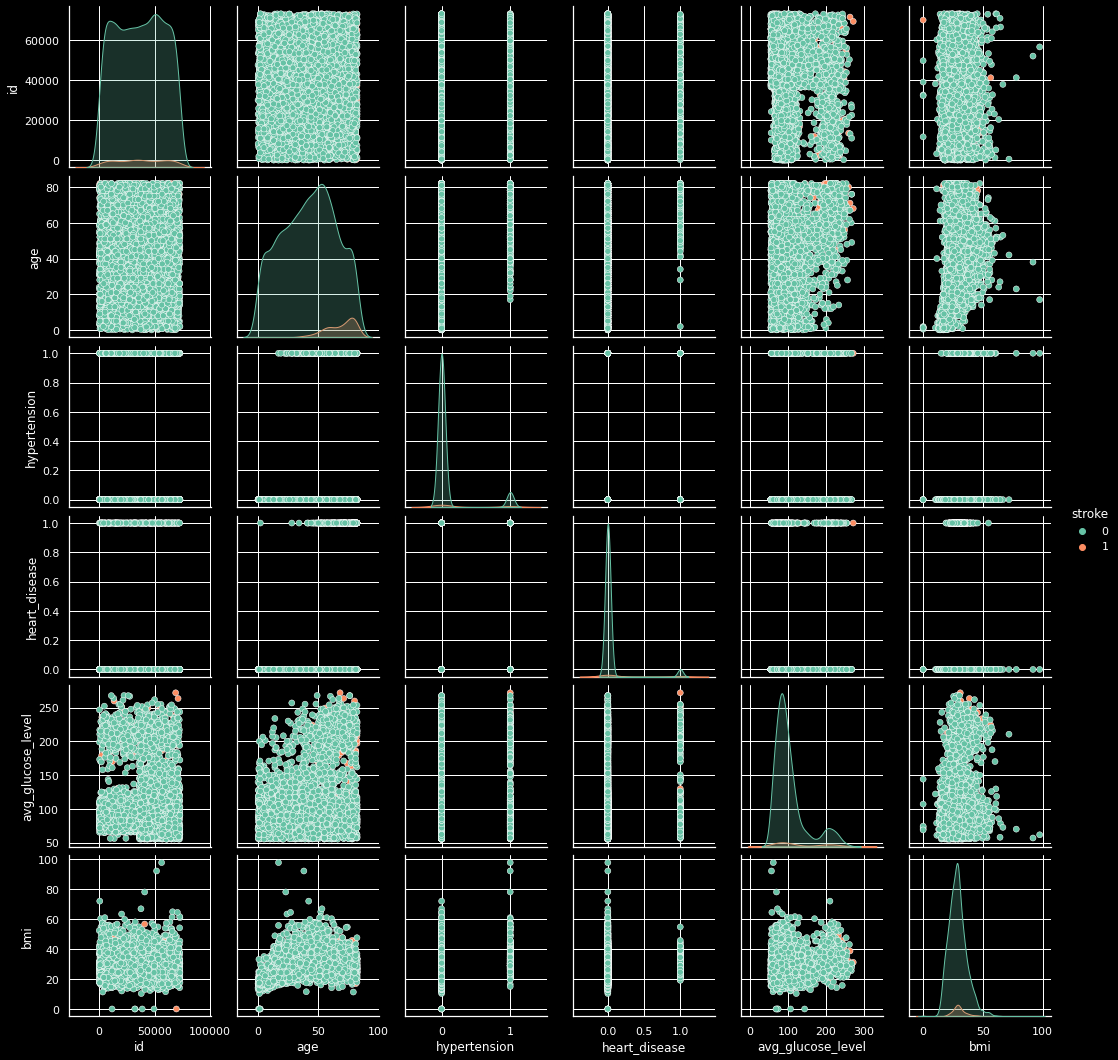

In [125]:
sns.pairplot(data=df, hue='stroke')

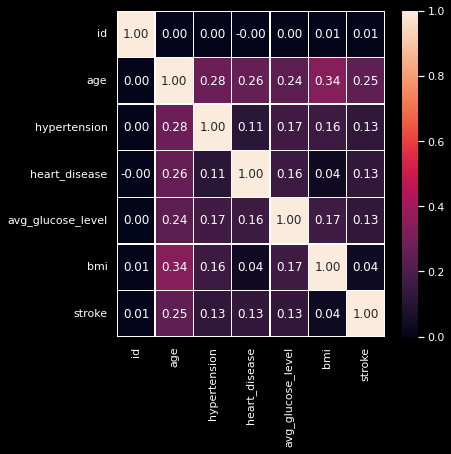

In [126]:
# Checking the correlation among various features
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')
plt.show()

#🔶 **Data Preprocessing**

In [127]:
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age_group',
 'age_group']

In [128]:
# Encoding Categorical Columns
cat_cols.pop()
cat_cols.pop()
df_enc = pd.get_dummies(df[cat_cols], drop_first=True)
df_enc.head()

,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,1,1,0,1,0,0,1,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,1,0,0,0,1,0


In [129]:
df[df_enc.columns] = df_enc
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0


In [130]:
df.drop(cat_cols, axis=1, inplace=True)
df.head()

,id,age,avg_glucose_level,bmi,stroke,age_group,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,Senior,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,202.21,28.9,1,Senior,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.5,1,Senior,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,Adult,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.0,1,Senior,0,1,0,0,1,0,0,0,1,0


In [132]:
# Dropping ID and age_group
df_final=df.drop(['id','age_group'], axis=1)
df_final.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


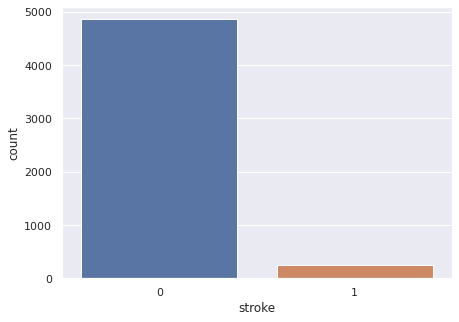

Notice that in the selected dataset, the two classes have huge degrees of imbalance in between them. This can considerably affect our model's performance. To avoid this, we make use of Random Over-Sampling of the minority class. Referred to the link: <https://www.kaggle.com/code/casper6290/strokeprediction-99-acc>

In [134]:
# Oversampling of Minority Class
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X = df_final.drop(['stroke'], axis=1)
y = df_final['stroke']
X_over, y_over = oversample.fit_resample(X,y)

In [135]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, stratify=y_over, random_state=42)

In [136]:
# Scaling the numerical columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[con_cols]=scaler.fit_transform(X_train[con_cols])
X_test[con_cols]=scaler.transform(X_test[con_cols])
X_train.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
9192,0.414947,-0.094752,-0.049327,1,1,0,0,1,0,0,1,0,0
3629,0.145628,1.619252,1.445379,1,1,0,0,0,0,0,0,1,0
9526,1.178016,-0.794813,-0.613367,0,1,0,0,1,0,0,0,1,0
539,-0.527668,-0.669222,3.123398,0,1,0,1,0,0,0,0,0,0
5479,0.953584,-1.005974,-0.063428,0,1,0,0,0,0,0,1,0,0


In [34]:
X_train.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2745,-1.695124,0.112519,0.020707,1,0,0,0,0,0,1,0,1,0
6982,1.041897,-0.494921,-0.363733,1,0,0,0,1,0,1,0,1,0
2454,0.234251,-0.387486,2.142246,0,0,0,1,0,0,1,0,0,1
1923,0.144513,-0.493626,0.946211,0,1,0,1,0,0,1,0,1,0
5284,-0.708002,-0.354942,0.020707,0,1,0,0,1,0,1,0,0,1


# 🔶**Model Building**

### 1. **K-Nearest Neighbours**

While building with K nearest neighbours, we can otimize the performace of the model by selecting a proper value of parameter 'k'. This ensures that we do not encounter the problems of overfitting and underfitting. To do this, we will implement the model for a range of values of 'k' and will select only that value where the error is minimum.




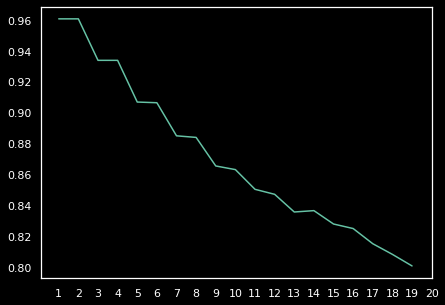

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1458
           1       0.95      1.00      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916



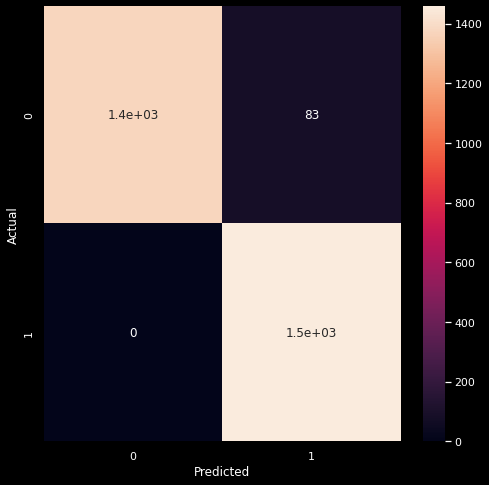

In [138]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

Thus with KNN method, we are getting an accuracy of about 97%. Lets try to develop some other ML Models. 

### 2. **Support Vector Machine**

 Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1458
           1       0.98      1.00      0.99      1458

    accuracy                           0.99      2916
   macro avg       0.99      0.99      0.99      2916
weighted avg       0.99      0.99      0.99      2916



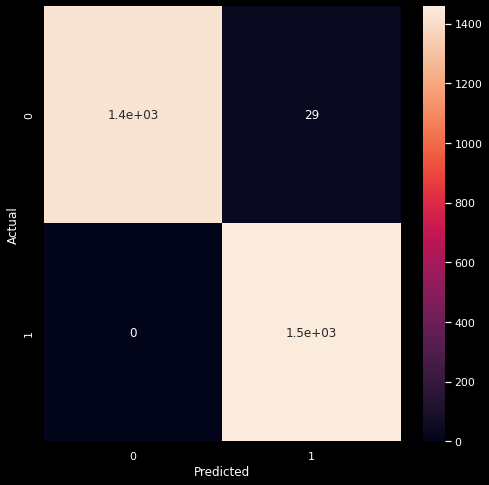

In [139]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

### 3. **Logistic Regression**

Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1458
           1       0.75      0.81      0.78      1458

    accuracy                           0.77      2916
   macro avg       0.77      0.77      0.77      2916
weighted avg       0.77      0.77      0.77      2916



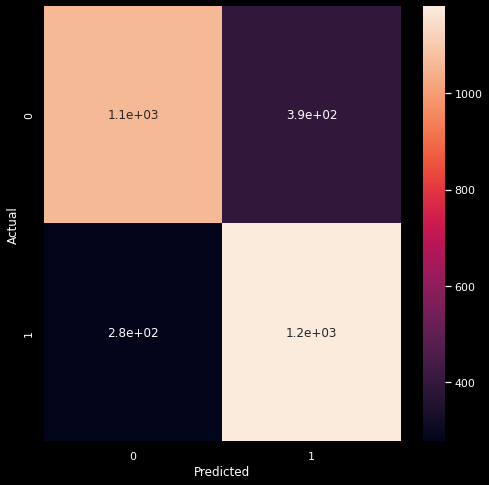

In [140]:
# Implementing Logistic Regression
import warnings 
warnings.filterwarnings('ignore')
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

The Accuracy obtained using Logistic Regression is 77%

### 4. **Random Forest Classifier**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1458
           1       0.98      1.00      0.99      1458

    accuracy                           0.99      2916
   macro avg       0.99      0.99      0.99      2916
weighted avg       0.99      0.99      0.99      2916



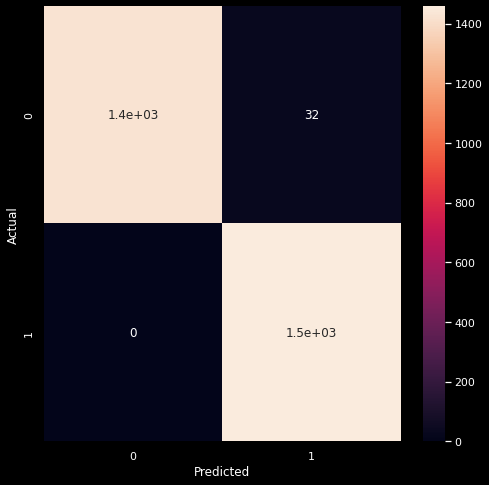

In [141]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))

## **Outcome**

The Support Vector Machine gives the best accuracy and recall. One great thing about the model is that it does not miss classify any Stroke Patient as a Non-Stroke patient. This feature is an important aspect of the model as nobody wants to classify a stroke suffering patient as a Non-Stroke. This might cause lack of medical attention towards the patient. 